% Dazhong Li
# Dissipation Test  Data processing

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import exp
import os
import matplotlib.patches as mpatches

## Import data and input


In [32]:
path =r'G:\Actual Job\211036\11-00 Calculations\11-02 Seawall Design\Post 2016 GI\01 GI Received\20180105\HKBCF Portion\CH3850\CH3850-CPT6(1)'
os.chdir(path)
filename = [fl for fl in os.listdir() if 'DIS_MMXP.asc' in fl]

In [33]:
filename

['CH3850-CPT6(1)_DIS_MMXP.asc']

# We will fit the curve with an exponential function 
Such a function would work fine because when $x->\infty, u -> constant $
$$ u = a\cdot e^{-b\cdot x} +c$$

In [34]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [35]:
# direct fit the data will cause some problems, we normalise the data first before feeding to the curve fitting 
def fit_data(df,cut_off):
    x_data = np.array(df[df.Time>t_cutoff].Time).copy()
    y_data = np.array(df[df.Time>t_cutoff]['Piezometric Head']).copy()
    #It is better that we scale the data before do the curve fitting
    x_scale = x_data.max(); y_scale = y_data.min()
    x_data = x_data/x_scale; y_data=y_data/y_scale
    popt, pcov = curve_fit(func, x_data, y_data)
    return popt, pcov,x_scale, y_scale

In [36]:
def plot_data(df,popt,pcov,x_scale,y_scale,hour):
    figure_title = name + ' Dissipation Test at {0:2.2f}mPD'.format(start_level-depth)+ "\n (Test Lasted for {:.1f} hours)".format(hour)
    figure_name =name + ' Dissipation Test at {0:2.2f}mPD'.format(start_level-depth)+ '.pdf'
    x_max_fitted = 200000 
    x_fitted = np.arange(1,x_max_fitted/x_scale,0.1)
    y_fitted = func(x_fitted,*popt) 
    fig = plt.figure(figsize=(7.27,11.69))
    fig.suptitle(figure_title,fontsize=20)
    ax = fig.add_subplot(211)
    ax_log = fig.add_subplot(212)
    df.plot(x = 'Time',y='Piezometric Head', logx=True,ax = ax_log)
    df.plot(x = 'Time',y='Piezometric Head', logx=False,ax = ax)
    ax.set_ylabel('Piezometric Head(mPD)')
    ax.set_xlabel('Time[s]')
    ax_log.set_ylabel('Piezometric Head(mPD)')
    ax_log.set_xlabel('Time[s]')
    ax.grid();ax_log.grid()
    
    x_hydro = [df.Time.min(),df.Time.max()]
    y_hydro = [1.2,1.2]
    ax.plot(x_fitted*x_scale,y_fitted*y_scale,'r--',label='Fitted Line')
    ax_log.plot(x_fitted*x_scale,y_fitted*y_scale,'r--',label='Fitted Line')
    x1 = x_max_fitted,
    y1 = y_scale*func(x_max_fitted,*popt)
    el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
    #ax_log.add_artist(el)
    txt_hydrostatic_level = '{0:2.1f}mPD'.format(y_scale*func(x_max_fitted,*popt))
    #import pdb; pdb.set_trace()
    ax_log.annotate(txt_hydrostatic_level, xy =(x_max_fitted,y1),xytext=(4000.0,30.0),
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),)
    ax.set_xlim([0,x_max_fitted])
    ax_log.set_xlim([0,x_max_fitted])
    ax.set_ylim([0,100])
    ax_log.set_ylim([0,100])
    ax.legend();ax_log.legend()
    fig.savefig(figure_name+'.pdf')

    #ax.plot(x_hydro,y_hydro,'b--',label='Hydrostatic Level')
    ax.legend()


Test lasted for 7.01 hours
what iss the level of ground11.58


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


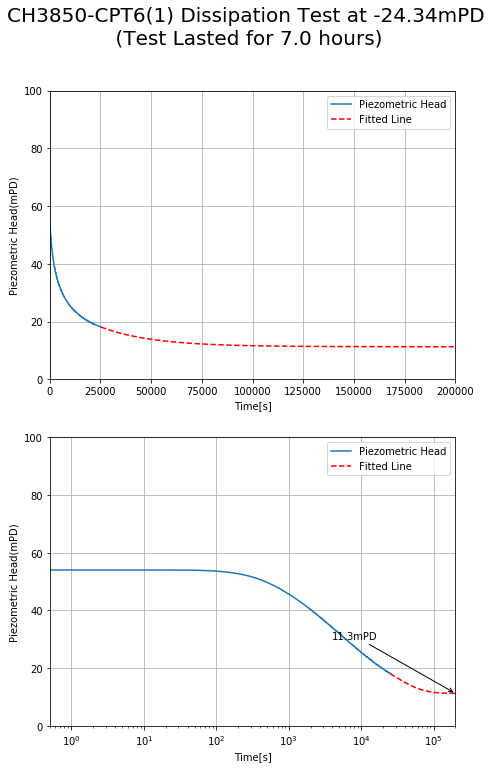

In [40]:
#%%writefile CH4900_dissipation_test.py
for fl in filename:
    data_block=[]
    with open(fl,'r') as infile:
        for line_number,line in enumerate(infile):
            if  ' Data table:' in line:
                data_block.append(line_number)
    for i,blk in enumerate(data_block):
        if len(data_block)>i+1:
            nrows = data_block[i+1]-data_block[i]-47
            df = pd.read_csv(fl,skiprows=blk+3,nrows = nrows,delimiter = r"\s+") 
        else:
            df = pd.read_csv(fl,skiprows=blk+3,delimiter = r"\s+") 
        df.columns=['Rec','Depth','Time','Pore2','Cone']
        print('Test lasted for {:.2f} hours'.format(df.Time.max()/60/60))
        name = fl.split('_')[0]
        start_level = float(input('what iss the level of ground'))
        water_table = 1.2
        depth = df.Depth.max()
        df.set_index('Time')
        df['head'] = df['Pore2']*1000/10
        df['Piezometric Head'] = df['head']-(water_table-(start_level-depth))
        t_cutoff = np.array(df.Time)[int(len(np.array(df.Time))/20)*-1]
        popt, pcov,xscale,yscale = fit_data(df,t_cutoff)
        plot_data(df,popt,pcov,xscale,yscale,df.Time.max()/60/60) 

In [17]:

df

,Rec,Depth,Time,Pore2,Cone
0,5957,30.999,0.38,0.6748,0.4827
1,5958,30.999,1.00,0.6744,0.4824
2,5959,30.999,1.50,0.6749,0.4809
3,5960,30.999,2.00,0.6757,0.4803
4,5961,30.999,2.38,0.6753,0.4806
5,5962,30.999,3.00,0.6754,0.4805
6,5963,30.999,3.50,0.6756,0.4784
7,5964,30.999,4.00,0.6761,0.4775
8,5965,30.999,4.38,0.6762,0.4766
9,5966,30.999,5.00,0.6764,0.4778


In [ ]:
np.array(df.Time)[-1000]

In [ ]:
int(len(np.array(df.Time))/3)

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7

fig = plt.figure(1, figsize=(8,3))
fig.clf()
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

#from matplotlib.font_manager import FontProperties

def add_at(ax, t, loc=2):
    fp = dict(size=10)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at


grid = AxesGrid(fig, 111, (1, 4), label_mode="1", share_all=True)

grid[0].set_autoscale_on(False)

ax = grid[0]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "connect", loc=2)

ax = grid[1]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "clip", loc=2)


ax = grid[2]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "shrink", loc=2)


ax = grid[3]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="fancy", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "mutate", loc=2)

grid[0].set_xlim(0, 1)
grid[0].set_ylim(0, 1)
grid[0].axis["bottom"].toggle(ticklabels=False)
grid[0].axis["left"].toggle(ticklabels=False)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.draw()
plt.show()


In [3]:
plt.plot?

Signature: plt.plot(*args, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the  appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, color='green', marker='o', linestyle='